# Content
     
**Data Preprocessing**  
- Loading Data
- Glossary
- Dealing with missing Values
- Feature Engieenier
   
**EDA - Exploratory Data Analysis**
- Summary Statistic
- Histogram
- Pearson Correlation Matrix
- Review with Pandas Profiling
- Insights
   
**Data Preparation**
- Dealing with Outliers - Using Isolation Forest
- Normalization
- Standardization
- Dimensionality Reduction
 - PCA
 - UMAP
 - t-SNE

**Machine Learning**
- Kmeans
- Hieracical Cluster
- Gausian Mistured Model

# Data Preprossesing

In [47]:
import numpy as np
import pandas as pd
from tabulate import tabulate
import warnings

from sklearn.ensemble import IsolationForest
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from pandas_profiling import ProfileReport

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from scipy.cluster import hierarchy

from sklearn.metrics import silhouette_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA
from umap.umap_ import UMAP
from sklearn.manifold import TSNE

from plotly.offline import plot, iplot, init_notebook_mode
import plotly as py
from plotly import express as px
import plotly.graph_objs as go

from IPython.display import HTML
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

warnings.simplefilter(action='ignore', category=FutureWarning)

In [48]:
def jupyter_menu_settings():   
    
    """ Best looking changes """
    
    display(HTML("""
            <style>

            h1 {
            background-color: #0E2031;
            color: white;
            padding: 15px 15px;
            text-align: center;
            font-family: Arial, Helvetica, sans-serif;
            border-radius:10px 10px;
            }

            h2 {
            background-color: #153656;
            color: white;
            padding: 10px 10px;
            text-align: center;
            font-family: Arial, Helvetica, sans-serif
            border-radius:10px 10px;
            }

            </style>            
    """))

def jupyter_table_settings():
    pd.set_option('display.expand_frame_repr', False )
    pd.set_option('display.max_columns', 30)
    pd.set_option('display.max_rows', 30)

In [49]:
rfm_coordinates = {"Champions": [3, 5, 0.8, 1],
                   "Loyal Customers": [3, 5, 0.4, 0.8],
                   "Cannot Lose Them": [4, 5, 0, 0.4],
                   "At Risk": [2, 4, 0, 0.4]}

In [50]:
def matplotlib_settings():
    """ Optimize general settings, standardize plot sizes, etc. """
    
#     %matplotlib inline
#     plt.style.use( 'ggplot' )
#     plt.rcParams['figure.figsize'] = [12, 6]
#     plt.rcParams['font.size'] = 20

In [51]:
jupyter_menu_settings()
jupyter_table_settings()

## Loading Data

In [52]:
data_raw = pd.read_csv('../data/CC_GENERAL.csv', encoding='iso-8859-1')
data_raw.shape

(8950, 18)

In [53]:
data = data_raw.copy()

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [69]:
glossary_en = [['Columns', 'Meaning'],
              ['CUST_ID', 'Unique Identifier of customer'],
              ['BALANCE', 'Balance amount left in their account to make purchases'],
              ['BALANCE_FREQUENCY', 'How frequently the Balance is updated, score between 0 and 1 (1 = High, 0 = Low)'],
              ['PURCHASES', 'Amount of purchases made from account'],
              ['ONEOFF_PURCHASES', 'Maximum purchase amount done in one-go'],
              ['INSTALLMENTS_PURCHASES', 'Amount of purchase done in installment'],
              ['CASH_ADVANCE', 'Cash in advance given by the user'],
              ['PURCHASES_FREQUENCY', 'How frequently the Purchases are being made, score between 0 and 1 (1 = High, 0 = Low)'],
              ['ONEOFF_PURCHASES_FREQUENCY', 'How frequently purchases are happening in one-go (1 = High, 0 = Low)'],
              ['PURCHASES_INSTALLMENTS_FREQUENCY', 'How frequently purchases in installments are being done(1 = High, 0 = Low)'],
              ['CASH_ADVANCE_FREQUENCY', 'How frequently the cash in advance being paid'],
              ['CASH_ADVANCE_TRX', 'Number of Transactions made with "Cash in Advanced"'],
              ['PURCHASES_TRX', 'Number of purchase transactions made'],
              ['CREDIT_LIMIT', 'Limit of Credit Card for user'],
              ['PAYMENTS', 'Amount of Payment done by user'],
              ['MINIMUM_PAYMENTS', 'Minimum amount of payments made by user'],
              ['PRC_FULL_PAYMENT', 'Percent of full payment paid by user'],
              ['TENURE', 'Tenure of credit card service for user']
             ]
print(tabulate(glossary_en, headers='firstrow', stralign='left', tablefmt='simple'))

Columns                           Meaning
--------------------------------  --------------------------------------------------------------------------------------
CUST_ID                           Unique Identifier of customer
BALANCE                           Balance amount left in their account to make purchases
BALANCE_FREQUENCY                 How frequently the Balance is updated, score between 0 and 1 (1 = High, 0 = Low)
PURCHASES                         Amount of purchases made from account
ONEOFF_PURCHASES                  Maximum purchase amount done in one-go
INSTALLMENTS_PURCHASES            Amount of purchase done in installment
CASH_ADVANCE                      Cash in advance given by the user
PURCHASES_FREQUENCY               How frequently the Purchases are being made, score between 0 and 1 (1 = High, 0 = Low)
ONEOFF_PURCHASES_FREQUENCY        How frequently purchases are happening in one-go (1 = High, 0 = Low)
PURCHASES_INSTALLMENTS_FREQUENCY  How frequently purchases 

In [70]:
glossary_pt = [['Colunas', 'Significado'],
              ['CUST_ID', 'Identificador único do cliente'],
              ['SALDO', 'Valor do saldo do cartão de crédito deixado na conta para fazer compras'],
              ['FREQUENCIA_SALDO', 'Frequência com que o saldo é atualizado, pontuação entre 0 e 1 (1 = Alto, 0 = Baixo)'],
              ['COMPRAS', 'Valor das compras feitas na conta'],
              ['COMPRAS_ONEOFF', 'Valor máximo de compra feito de uma só vez'],
              ['COMPRAS_PARCELADAS', 'Valor da compra parcelada'],
              ['ADIANTAMENTO', 'Dinheiro adiantado dado pelo usuário'],
              ['FREQUENCIA_COMPRA', 'Com que frequência as compras estão sendo feitas, pontuação entre 0 e 1 (1 = alta, 0 = baixa)'],
              ['FREQUENCIA_COMPRAS_ONEOFF', 'Com que frequência as compras acontecem de uma só vez (1 = Alta, 0 = Baixa)'],
              ['FREQUENCIA_COMPRAs_PARCELADA', 'Com que frequência as compras parceladas estão sendo feitas (1 = Alta, 0 = Baixa)'],
              ['FREQUENCIA_ADIANTAMENTO', 'Com que frequência o adiantamento em dinheiro está sendo pago'],
              ['ADIANTAMENTO_TRX', 'Número de transações feitas com "Cash in Advanced"'],
              ['COMPRAS_TRX', 'Número de transações de compra feitas'],
              ['LIMITE_CARTAO', 'Limite de Cartão de Crédito por usuário'],
              ['PAGAMENTOS', 'Valor do pagamento feito pelo usuário'],
              ['PAGAMENTO_MINIMO', 'Valor mínimo de pagamentos feitos pelo usuário'],
              ['PORCENTAGEM_PAGAMENTO_TOTAL', 'Porcentagem do pagamento integral pago pelo usuário'],
              ['PRAZO', 'Prazo do serviço de cartão de crédito para o usuário']
              ]
print(tabulate(glossary_pt, headers='firstrow', stralign='left', tablefmt='simple'))

Colunas                       Significado
----------------------------  ---------------------------------------------------------------------------------------------
CUST_ID                       Identificador único do cliente
SALDO                         Valor do saldo do cartão de crédito deixado na conta para fazer compras
FREQUENCIA_SALDO              Frequência com que o saldo é atualizado, pontuação entre 0 e 1 (1 = Alto, 0 = Baixo)
COMPRAS                       Valor das compras feitas na conta
COMPRAS_ONEOFF                Valor máximo de compra feito de uma só vez
COMPRAS_PARCELADAS            Valor da compra parcelada
ADIANTAMENTO                  Dinheiro adiantado dado pelo usuário
FREQUENCIA_COMPRA             Com que frequência as compras estão sendo feitas, pontuação entre 0 e 1 (1 = alta, 0 = baixa)
FREQUENCIA_COMPRAS_ONEOFF     Com que frequência as compras acontecem de uma só vez (1 = Alta, 0 = Baixa)
FREQUENCIA_COMPRAs_PARCELADA  Com que frequência as compras parcel

## Dealing with missing values - Using KNN Inputer

In [57]:
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [58]:
X_knn = data.drop(['CUST_ID'], axis=1)
numerical_features = X_knn.select_dtypes(include = ['int64','float64']).columns.values

In [59]:
#Example with NaN row
data.iloc[8946]

CUST_ID                                 C19187
BALANCE                              19.183215
BALANCE_FREQUENCY                          1.0
PURCHASES                                300.0
ONEOFF_PURCHASES                           0.0
INSTALLMENTS_PURCHASES                   300.0
CASH_ADVANCE                               0.0
PURCHASES_FREQUENCY                        1.0
ONEOFF_PURCHASES_FREQUENCY                 0.0
PURCHASES_INSTALLMENTS_FREQUENCY      0.833333
CASH_ADVANCE_FREQUENCY                     0.0
CASH_ADVANCE_TRX                             0
PURCHASES_TRX                                6
CREDIT_LIMIT                            1000.0
PAYMENTS                            275.861322
MINIMUM_PAYMENTS                           NaN
PRC_FULL_PAYMENT                           0.0
TENURE                                       6
Name: 8946, dtype: object

In [60]:
num_imputer = KNNImputer()
num_imputer.fit(X_knn[numerical_features])
X_knn[numerical_features] = num_imputer.transform(X_knn[numerical_features])

In [61]:
# MINIMUM_PAYMENTS for customer C19187 guessing by KNN was 156.06
X_knn.loc[8946]

BALANCE                               19.183215
BALANCE_FREQUENCY                      1.000000
PURCHASES                            300.000000
ONEOFF_PURCHASES                       0.000000
INSTALLMENTS_PURCHASES               300.000000
CASH_ADVANCE                           0.000000
PURCHASES_FREQUENCY                    1.000000
ONEOFF_PURCHASES_FREQUENCY             0.000000
PURCHASES_INSTALLMENTS_FREQUENCY       0.833333
CASH_ADVANCE_FREQUENCY                 0.000000
CASH_ADVANCE_TRX                       0.000000
PURCHASES_TRX                          6.000000
CREDIT_LIMIT                        1000.000000
PAYMENTS                             275.861322
MINIMUM_PAYMENTS                     156.060050
PRC_FULL_PAYMENT                       0.000000
TENURE                                 6.000000
Name: 8946, dtype: float64

In [62]:
data_new = pd.concat([data[['CUST_ID']], X_knn],axis=1)
data_new.shape

(8950, 18)

In [63]:
data_new.duplicated().sum()

0

## EDA

In [64]:
def display_stats(sumary):   
    
    sumary=data_new.describe()  
    skewness=data_new.skew()
    kurtosis=data_new.kurtosis()
    aux=sumary.append([skewness, kurtosis], ignore_index=True)
    idx=pd.Series(['count','mean','std','min','25%','50%','75%','max','skewness','kurtosis'],name='Summary Statistic')
    sumary=pd.concat([aux,idx],axis=1).set_index('Summary Statistic').T
    cm = sns.light_palette("#A2A2A2", as_cmap = True)
    display(sumary.style.format('{:.2f}').background_gradient(subset=(sumary.index[1:],sumary.columns[:]),cmap=cm))

In [65]:
display_stats(data_new)

Summary Statistic,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
BALANCE,8950.00,1564.47,2081.53,0.00,128.28,873.39,2054.14,19043.14,2.39,7.67
BALANCE_FREQUENCY,8950.00,0.88,0.24,0.00,0.89,1.00,1.00,1.00,-2.02,3.09
PURCHASES,8950.00,1003.20,2136.63,0.00,39.63,361.28,1110.13,49039.57,8.14,111.39
ONEOFF_PURCHASES,8950.00,592.44,1659.89,0.00,0.00,38.00,577.40,40761.25,10.05,164.19
INSTALLMENTS_PURCHASES,8950.00,411.07,904.34,0.00,0.00,89.00,468.64,22500.00,7.30,96.58
CASH_ADVANCE,8950.00,978.87,2097.16,0.00,0.00,0.00,1113.82,47137.21,5.17,52.90
PURCHASES_FREQUENCY,8950.00,0.49,0.40,0.00,0.08,0.50,0.92,1.00,0.06,-1.64
ONEOFF_PURCHASES_FREQUENCY,8950.00,0.20,0.30,0.00,0.00,0.08,0.30,1.00,1.54,1.16
PURCHASES_INSTALLMENTS_FREQUENCY,8950.00,0.36,0.40,0.00,0.00,0.17,0.75,1.00,0.51,-1.40
CASH_ADVANCE_FREQUENCY,8950.00,0.14,0.20,0.00,0.00,0.00,0.22,1.50,1.83,3.33


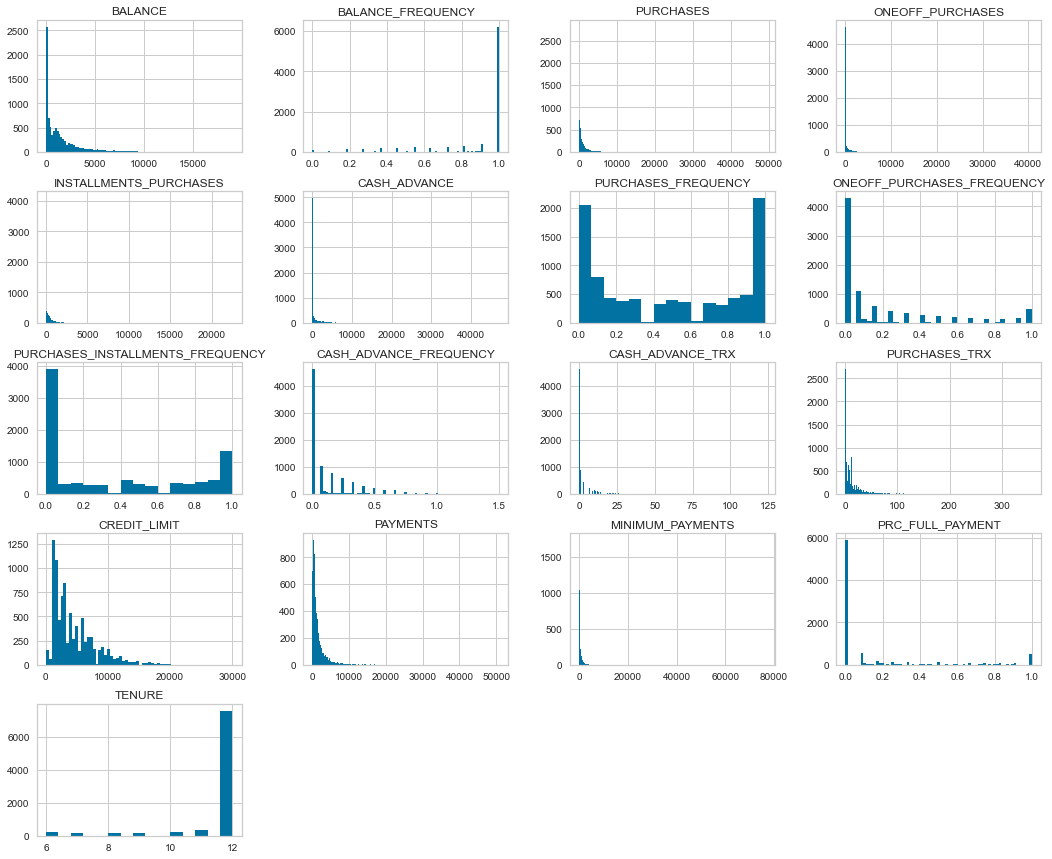

In [66]:
data_new[numerical_features].hist(figsize=(18,15), bins='auto');

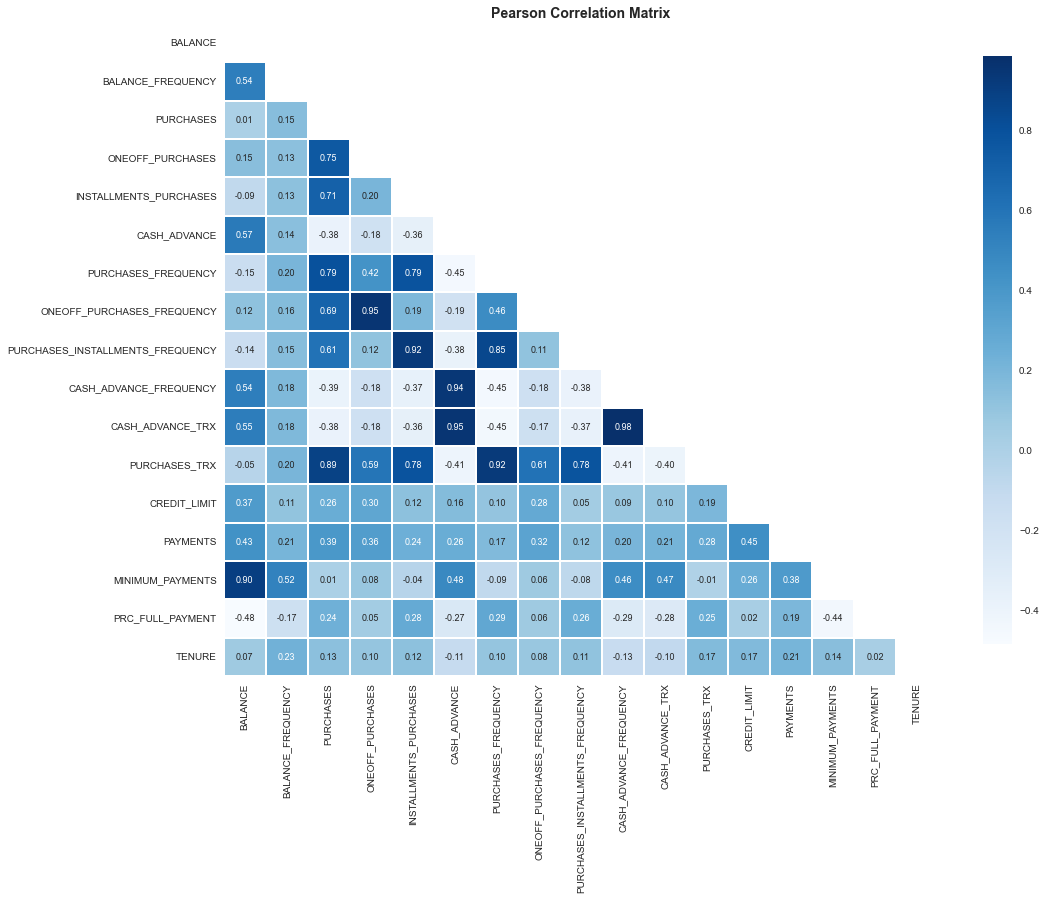

In [67]:
mask = np.zeros_like(data_new.corr(), dtype=bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))

plt.title('Pearson Correlation Matrix',fontsize=14, fontweight='bold')

sns.heatmap(data_new.corr(method='spearman'), linewidths=0.25,fmt=".2f", cmap="Blues", linecolor='w',annot=True,annot_kws={"size":9},mask=mask,cbar_kws={"shrink": .9});

In [68]:
data_new

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,379.829982,0.000000,12.0
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,325.594462,48.886365,0.500000,6.0
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,275.861322,156.060050,0.000000,6.0
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0.0,5.0,1000.0,81.270775,82.418369,0.250000,6.0
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2.0,0.0,500.0,52.549959,55.755628,0.250000,6.0


In [ ]:
#profile = ProfileReport(data_new, title="Pandas Profiling Report", html={'style':{'full_width':True}})

In [ ]:
#profile.to_notebook_iframe()

## Q & A Business Bank - Credit Card

**Quais as vantagens, para o Banco, de parcelar as compras no cartão de crédito?**


1. Aumento da fidelidade do cliente, pois é mais provável que os clientes usem o mesmo cartão para compras futuras quando puderem dividir seus pagamentos em parcelas menores e mais gerenciáveis.
2. Maior lucratividade, pois o banco pode cobrar juros sobre o saldo não pago e receber taxas adicionais do comerciante pelo processamento dos pagamentos.
3. Redução do risco de crédito, pois o cliente tem maior probabilidade de quitar o saldo integralmente se os pagamentos forem parcelados no tempo.
4. Aumento das oportunidades de venda cruzada de produtos e serviços adicionais, pois os clientes podem estar mais dispostos a aceitar outras ofertas se já estiverem confortáveis ​​com a estrutura de pagamento parcelado.



**Quais são as desvantagens, para o Banco, de parcelar as compras no cartão de crédito?**


1. Aumento do risco de inadimplência: Quando o consumidor paga uma compra parcelada, o Banco assume mais risco de inadimplência do consumidor.

2. Aumento dos custos administrativos: Permitir que os clientes paguem suas compras em parcelas exige custos administrativos adicionais para o Banco, como o custo de criação e gerenciamento de planos de pagamento.

3. Fluxo de caixa reduzido: O pagamento parcelado geralmente significa que o Banco receberá os pagamentos em um período de tempo, reduzindo seu fluxo de caixa e dificultando a gestão da liquidez.

4. Risco de taxa de juros: Quando um Banco oferece parcelamento, normalmente cobra juros no balanço. Isso expõe o Banco ao risco de flutuações nas taxas de juros, bem como ao risco de não pagamento do saldo integral por parte do consumidor.


**Quais as vantagens, para o Banco, de compras pontuais no cartão de crédito?**


1. Aumento da receita: As empresas de cartão de crédito ganham dinheiro com taxas, como as cobradas para processar pagamentos e com juros sobre saldos pendentes. Compras pontuais em um cartão de crédito normalmente resultam em gastos mais altos e aumento de receita para o banco.

2. Maior fidelidade do cliente: ao oferecer taxas competitivas e programas de recompensas, os bancos podem incentivar os clientes a usar seus cartões de crédito para compras pontuais. Isso, por sua vez, pode levar a uma maior fidelidade dos clientes, que podem optar por continuar usando o mesmo cartão para compras futuras.

3. Risco reduzido: As compras pontuais com cartão de crédito são normalmente menos arriscadas para o banco do que as compras mais frequentes, pois os clientes têm maior probabilidade de pagar seu saldo integral a cada mês. Isso reduz o risco de inadimplência, o que pode resultar em perdas significativas para o banco.


**Quais são as desvantagens, para o Banco, de compras pontuais no cartão de crédito?**

1. Alto risco de inadimplência: compras pontuais no cartão de crédito podem ser uma proposta de alto risco para o banco, pois os clientes podem não conseguir pagar o saldo total no vencimento da fatura. Isso pode fazer com que o banco sofra uma perda significativa.

2. Retornos baixos: Os emissores de cartões de crédito geralmente cobram taxas de juros e taxas mais baixas em compras pontuais do que em saldos acumulados mês a mês. Isso significa que o banco não ganhará tanto dinheiro com compras pontuais feitas com cartão de crédito.

3. Aumento do risco de fraude: compras pontuais podem ser o alvo principal dos fraudadores, e os bancos podem sofrer perdas significativas devido a atividades fraudulentas. Para combater isso, os bancos geralmente empregam algoritmos sofisticados de detecção de fraudes, cuja manutenção pode ser cara.


**Qual a taxa de pagamento do cartão de crédito en relação ao  do cartão?**

O pagamento estimado em relação ao valor total do cartão de crédito normalmente é calculado como uma porcentagem do seu saldo mensal.

- Existe uma grande correlação com a modalidade de compra com a frequencia da compra, ONEOFF_PURCHASES / ONEOFF_PURCHASES_FREQUENCY, INSTALLMENTS_PURCHASES / PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE / CASH_ADVANCE_FREQUENCY, 

- A maioria dos clientes preferem o prazo de 12 meses em comparação com outras opções de prazo. 

- Ao investigar mais a coluna SALDO, parece que há muitos cartões de crédito com saldo 0. Também é compatível com outros valores de compra 0 na coluna COMPRA. Com base nesses resultados, pode-se supor que alguns usuários estão intencionalmente mantendo o saldo baixo em sua conta para obter um limite de crédito alto, o que afeta o aumento da taxa de utilização de crédito e a pontuação de crédito.

# Data Preparation

## Dealing with Outliers - Using Isolation Forest

In [ ]:
data_noutliers = data_new.copy()

In [ ]:
# Arbitrarily assuming 0.01% of the data are possible outliers
isfo = IsolationForest(contamination=0.01)#, max_samples = 100, random_state = RANDOM_SEED)
isfo.fit(data_noutliers[numerical_features])

In [ ]:
data_noutliers['anomaly_score'] =  isfo.decision_function(data_noutliers[numerical_features])
data_noutliers['anomaly'] = isfo.predict(data_noutliers[numerical_features])

In [ ]:
print("Number of rows with outliers:", data_noutliers[data_noutliers['anomaly'] == -1].shape[0])
print("Number of rows without outliers", data_noutliers[data_noutliers['anomaly'] == 1].shape[0])
print("Number of original rows:", data_new.shape[0])

In [ ]:
data_noutliers['anomaly'].value_counts(normalize=True)

In [ ]:
# palette = ['#ff7f0e','#1f77b4']
# sns.pairplot(data_noutliers, vars=numerical_features, hue='anomaly', palette=palette)

In [ ]:
data_prep = data_noutliers.loc[data_noutliers['anomaly']==1]

In [ ]:
data_prep = data_prep.drop(columns=['anomaly','anomaly_score'], axis=1)

In [ ]:
data_prep

## Normalization

In [ ]:
#data_prep=data_new.copy() Testing without isolation forest

In [ ]:
log_columns = data_prep.skew().sort_values(ascending=False)
log_columns = log_columns.loc[log_columns > 0.75]
log_columns

In [ ]:
for col in log_columns.index:
    data_prep[col] = np.log1p(data_prep[col])

In [ ]:
data_prep[numerical_features].hist(figsize=(18,15), bins='auto');

## Standardzation

In [ ]:
mms = MinMaxScaler()

for col in data_prep[numerical_features]:
    data_prep[col] = mms.fit_transform(data_prep[[col]]).squeeze()

In [ ]:
data_prep

## Dimensionality Reduction - PCA

In [ ]:
# Checking All components first
pca = PCA(n_components=data_prep[numerical_features].shape[1], random_state=RANDOM_SEED)
components = pca.fit_transform(data_prep[numerical_features])
components.shape

In [ ]:
nfeatures = range(pca.n_components_)
nfeatures

In [ ]:
pca.explained_variance_ratio_

In [ ]:
data_prep[numerical_features].var().sort_values(ascending=False)

In [ ]:
plt.figure(figsize=(12,8))
plt.suptitle('PCA - Principal Component Analysis', fontsize=14, fontweight='bold')
plt.bar(nfeatures, pca.explained_variance_ratio_)
plt.plot(nfeatures, pca.explained_variance_ratio_.cumsum(),color='orange', linestyle='--',marker='o' )
plt.yticks(np.arange(0,1.05,0.05))
plt.xticks(np.arange(0,pca.n_components_,1))
plt.show()

In [ ]:
# With 9 components we have 96% of variance explanation
pca = PCA(9, random_state=RANDOM_SEED)
components = pca.fit_transform(data_prep[numerical_features])

In [ ]:
components.shape

## Dimensionality Reduction - UMAP

In [ ]:
clusters = data_prep.copy()

In [ ]:
# Dimensionality Reduction(to 2D) using technique UMAP 
umap = UMAP(random_state=RANDOM_SEED)
umap_embedding = umap.fit_transform(components)

# X,y axis representation for UMAP
clusters['umap_x'] = umap_embedding[:,0]
clusters['umap_y'] = umap_embedding[:,1]

In [ ]:
plt.figure(figsize=(7,4))
plt.title('UMAP', fontsize='14',fontweight='bold')
sns.scatterplot(data=clusters, x='umap_x', y='umap_y');

## Dimensionality Reduction - t-SNE

In [ ]:
# Dimensionality Reduction(to 2D) using technique TSNE
tsne = TSNE(n_components=2, init='pca', learning_rate='auto', n_jobs=-1, random_state=RANDOM_SEED)
tsne_embedding = tsne.fit_transform(components)

# X,y axis representation using TSNE
clusters['tsne_x'] = tsne_embedding[:,0]
clusters['tsne_y'] = tsne_embedding[:,1]

In [ ]:
plt.figure(figsize=(7,4))
plt.title('t-SNE', fontsize='14',fontweight='bold')
sns.scatterplot(data=clusters, x='tsne_x', y='tsne_y');

## Plotting Settings

In [ ]:
# Setting 2D plot parameters for Plotly
temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12)))

def plot_graph2D(x,y, cluster, title):    
    name=cluster.name
    #data=data.sort_values(by=cluster.name, ascending=True)
    cluster=cluster.astype(str)
    
    fig = px.scatter(#data, 
                     x=x, 
                     y=y, 
                     color=cluster, 
                     color_discrete_sequence=px.colors.qualitative.Prism
                    )

    fig.update_traces(marker=dict(size=11, 
                              opacity=0.75, 
                              line=dict(width=1, color='#F7F7F7')))

    fig.update_layout(template=temp, 
                  title=title, 
                  width=700, 
                  legend_title='Clusters',                  
                  xaxis=dict(title='x', showline=True, zeroline=False), 
                  yaxis=dict(title='y',showline=True, zeroline=False))
    
    
    fig.show()

## Evaluating Metrics

**Davies-Bouldin Score** - É uma medida da compactação de clusters em um conjunto de dados. Ele avalia a similaridade média entre clusters e é usado para medir a qualidade de um algoritmo de agrupamento. O índice leva em consideração a similaridade intra-cluster e a separação inter-cluster, e varia entre 0 (agrupamento perfeito) e infinito (agrupamento ruim). Quanto menor a pontuação, melhor o agrupamento. O índice Davies-Bouldin é comumente usado em algoritmos de aprendizado de máquina para determinar o número ideal de clusters em um conjunto de dados.

$$ DB = \frac{1}{R}\sum_{i=1}^{n}\max_{1 \leq j \leq n, j \neq i}\left (\frac{s_i + s_j}{d_{ij}}\right )$$

onde:

$s_i$ é a distância média dos pontos no cluster $i$ ao seu centróide

$d_{ij}$ é a distância entre os centróides dos clusters 

$i$, $j$ e $R$ são o número de clusters.

**Silhouette Score** - O Silhouette Score é uma métrica usada para medir o quão próximo cada ponto em um cluster está dos pontos em outros clusters. Pode variar de -1 (indicando que o ponto está muito distante de outros clusters) a 1 (indicando que o ponto está muito próximo de outros clusters). É calculado tomando a média do coeficiente de silhueta para cada ponto.

$$s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}$$

onde:

$a(i) = \frac{1}{|C_i| - 1} \sum_{j \in C_i, j \neq i} d(i, j)$

$b(i) = \min_{k \in C, k \neq C_i} \left\{\frac{1}{|C_k|} \sum_{j \in C_k} d(i, j)\right\}$

$C_i$ is the set of data points in cluster $i$

$d(i, j)$ is the distance between data points $i$ and $j$

## KMEANS

In [ ]:
# Finding best K param to Kmeans, using WCSS and Silhouette Score as metrics
kmeans_scores_list = []

for k in range(2,10):
    tunning_kmeans = KMeans(n_clusters=k, random_state=RANDOM_SEED)# init="k-means++",
    # We need to test which space (PCA, UMAP, t-SNE) performs best according to WCSS and Silhouette Score metrics
    # component, umap_embedding, tsne_embedding
    # Thus, the space embedding that presented the best results was the UMAP.
    tunning_kmeans_labels = tunning_kmeans.fit_predict(umap_embedding)
    
    ss = silhouette_score(umap_embedding, tunning_kmeans_labels, metric='euclidean')
    
    dbs = davies_bouldin_score(umap_embedding, tunning_kmeans_labels)
    
    kmeans_scores_list.append(pd.Series({'Clusters': k,
                                    'WCSS': tunning_kmeans.inertia_,
                                    'SS': ss,
                                    'Davies Bouldin Score': dbs}))

In [ ]:
kmeans_scores_table = (pd.concat(kmeans_scores_list, axis=1).T[['Clusters','WCSS','SS','Davies Bouldin Score']].set_index('Clusters'))
kmeans_scores_table

In [ ]:
plt.figure(figsize=(10,5))
elbow = KElbowVisualizer(tunning_kmeans, k=(2,12), timings = False)
elbow.fit(umap_embedding) #, timings = False
elbow.show();

In [ ]:
plt.figure(figsize=(10,5))
ss = KElbowVisualizer(tunning_kmeans, k=(2,12), metric = 'silhouette', timings = False)
ss.fit(umap_embedding)
ss.show();

In [ ]:
plt.figure(figsize=(10,5))
plt.suptitle('Davies Bouldin Score for KMeans Clustering', fontsize=12)
sns.lineplot(x=kmeans_scores_table.index, y=kmeans_scores_table['Davies Bouldin Score'], marker='o')
plt.xlabel('K');
plt.ylabel('Davies Bouldin Score');

In [ ]:
# Using the best k find to our purpouse
k=7
kmeans = KMeans( n_clusters=k, random_state=RANDOM_SEED)#init = "k-means++",
kmeans_labels = kmeans.fit_predict(umap_embedding)
clusters['KMeans'] = kmeans_labels

In [ ]:
plt.figure(figsize=(10,5))
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(umap_embedding)
visualizer.finalize()

In [ ]:
clusters.sort_values(by='KMeans')
plot_graph2D(clusters['umap_x'],
             clusters['umap_y'],
             clusters['KMeans'],
             title='KMeans Cluster using UMAP')

In [ ]:
# plot_graph2D(clusters['tsne_x'],
#              clusters['tsne_y'],
#              clusters['KMeans-Cluster'],
#              title='KMeans Cluster using t-SNE')

## Hierarchical Clustering

In [ ]:
hc_scores_list = []

for k in range(2,11):
    tunning_hc = hierarchy.linkage(umap_embedding, 'ward', metric='euclidean')# init="k-means++",
    
    # We need to test which space (PCA, UMAP, t-SNE) performs best according to WCSS and Silhouette Score metrics
    # component, umap_embedding, tsne_embedding
    # Thus, the space embedding that presented the best results was the UMAP.
    tunning_hc_labels = hierarchy.fcluster(tunning_hc, k, criterion='maxclust')
    
    ss = silhouette_score(umap_embedding, tunning_hc_labels, metric='euclidean')
    
    dbs = davies_bouldin_score(umap_embedding, tunning_hc_labels)
    
    hc_scores_list.append(pd.Series({'Clusters': k,
                                    'SS': ss,
                                    'Davies Bouldin Score': dbs}))

In [ ]:
hc_scores_table = (pd.concat(hc_scores_list, axis=1).T[['Clusters','SS','Davies Bouldin Score']].set_index('Clusters'))

In [ ]:
hc_scores_table

In [ ]:
plt.figure(figsize=(10,5))
plt.suptitle('Silhouette Score for Hierachical Clustering', fontsize=14, fontweight='bold')
sns.lineplot(x=hc_scores_table.index, y=hc_scores_table['SS'], marker='o')
plt.xlabel('K');
plt.ylabel('Silhouette Score');

In [ ]:
plt.figure(figsize=(10,5))
plt.suptitle('Davies Bouldin Score for Hierachical Clustering', fontsize=14, fontweight='bold')
sns.lineplot(x=hc_scores_table.index, y=hc_scores_table['Davies Bouldin Score'], marker='o')
plt.xlabel('K');
plt.ylabel('Davies Bouldin Score');

In [ ]:
methods=['complete','ward']

for i in methods:
    Z = hierarchy.linkage(umap_embedding, method=i, metric='euclidean')
    hierarchy.set_link_color_palette(['#5d69b1', '#52bca3', '#99c945'])

    fig, ax = plt.subplots(figsize=(14,6))
    den=hierarchy.dendrogram(Z, 
                             p=7, 
                             truncate_mode='lastp',
                             show_leaf_counts=True, 
                             ax=ax,
                             above_threshold_color='grey') #orientation='top', #color_threshold=100,
    
    #ax.axhline(10, color='grey', linestyle='--')
    ax.set_title(f'\nDendrogram of Hierarchical Clustering with {i.capitalize()} Linkage', fontweight='bold', fontsize='14')
    ax.set_xlabel('\nNumber of Customers in Cluster Leaf Nodes')
    ax.set_ylabel('Cluster Distance')
    ax.spines['right'].set_visible(False), ax.spines['top'].set_visible(False), ax.spines['bottom'].set_visible(False)
    fig.show()

In [ ]:
k=7
#hc = AgglomerativeClustering(k, affinity='euclidean', linkage='complete', compute_full_tree=False)
hc = hierarchy.linkage(umap_embedding, 'ward', metric='euclidean')
hc_labels = hierarchy.fcluster(hc, k, criterion='maxclust')
clusters["HierarchicalCluster"]=hc_labels

In [ ]:
plot_graph2D(clusters['umap_x'],
             clusters['umap_y'],
             clusters['HierarchicalCluster'],
             title='Hierarchical Cluster using UMAP')

## Gausian Mistured Model

In [ ]:
# Finding best K param to GMM, AIC and BIC as metrics
gmm_scores_list = []

for k in range(2,13):
    tunning_gmm = GaussianMixture(n_components=k, random_state=RANDOM_SEED)#n_init=5, init_params='k-means++', 
    tunning_gmm_labels = tunning_gmm.fit_predict(umap_embedding)
    
    
    ss = silhouette_score(umap_embedding, tunning_gmm_labels, metric='euclidean')
    dbs = davies_bouldin_score(umap_embedding, tunning_gmm_labels)
    
    gmm_scores_list.append(pd.Series({'Clusters': k,
                                    'AIC': tunning_gmm.aic(umap_embedding),
                                    'BIC': tunning_gmm.bic(umap_embedding),
                                    'SS': ss,
                                    'Davies Bouldin Score': dbs}))
    
gmm_scores_table = (pd.concat(gmm_scores_list, axis=1).T[['Clusters','AIC','BIC','SS','Davies Bouldin Score']]).set_index('Clusters')

In [ ]:
gmm_scores_table

In [ ]:
plt.figure(figsize=(10,5))
plt.suptitle('GMM Performace Metrics', fontsize=14, fontweight='bold')
sns.lineplot(x=gmm_scores_table.index, y=gmm_scores_table.AIC, label='AIC')
sns.lineplot(x=gmm_scores_table.index, y=gmm_scores_table.BIC, label='BIC')
plt.ylabel('AIC and BIC values')
plt.xlabel('Number of Clusters')
plt.legend(loc='best');

In [ ]:
plt.figure(figsize=(10,5))
plt.suptitle('Davies Bouldin Score for GMM Clustering', fontsize=14, fontweight='bold')
sns.lineplot(x=gmm_scores_table.index, y=gmm_scores_table['SS'], marker='o')
plt.xlabel('K');
plt.ylabel('Silhouette Score');

In [ ]:
plt.figure(figsize=(10,5))
plt.suptitle('Davies Bouldin Score for KMeans Clustering', fontsize=14, fontweight='bold')
sns.lineplot(x=gmm_scores_table.index, y=gmm_scores_table['Davies Bouldin Score'], marker='o')
plt.xlabel('K');
plt.ylabel('Davies Bouldin Score');

In [ ]:
k=7
gmm = GaussianMixture(n_components=k, random_state=RANDOM_SEED)#n_init=5, init_params='k-means++',
gmm_labels = gmm.fit_predict(umap_embedding)
clusters['GMM'] = gmm_labels

In [ ]:
#clusters_results.sort_values(by='GMM')
plot_graph2D(clusters['umap_x'],
             clusters['umap_y'],
             clusters['GMM'],
             title='GMM Cluster using UMAP')

## Best Model

In [ ]:
cluster_results = clusters.copy()

In [ ]:
cluster_results = pd.concat([clusters[['GMM']], data_new],axis=1)
cluster_results

In [ ]:
aux1=cluster_results.groupby('GMM').mean().reset_index()
aux2=cluster_results[['PURCHASES_FREQUENCY','GMM']].groupby('GMM').count().rename(columns={'PURCHASES_FREQUENCY': 'COUNT'}).reset_index()
cluster_results_mean = aux2.merge(aux1, how='left', on='GMM').set_index('GMM').T

In [ ]:
cm = sns.light_palette("#A2A2A2", as_cmap = True)

cluster_results_mean=cluster_results_mean.style.background_gradient(cmap = cm, axis = 1)\
    .set_precision(2)\
    .highlight_min(axis = 1, color = "#FF6347")\
    .highlight_max(axis = 1, color = "#2F4F4F")

cluster_results_mean

<blockquote style="color: #000000;">

**Cluster 00 - Cannot Lose Them** 
- São clientes que <mark>utilizam o cartão de crédito com baixa frequencia</mark>
- São clientes que utilizam a modalidade <mark>"ONE OFF"</mark> com <mark>alta frequencia</mark>
- São clientes que utilizam a modalidade <mark>"Parcelado"</mark> com <mark>baixissima frequencia</mark>
- São clientes que <mark>solicitam adiantamento</mark> de crédito com <mark>baixissima frequencia</mark> 
- São clientes que possuem <mark>moderada taxa de pagamento</mark>  com relação ao valor integral do cartão de crédito

*Rating: 3.5*

***

**Cluster 01 - Hinernating** 
- São clientes que <mark>utilizam o cartão de crédito com baixissima frequencia</mark>
- São clientes que utilizam a modalidade <mark>"ONE OFF"</mark> com <mark>baixissima frequencia</mark>
- São clientes que utilizam a modalidade <mark>"Parcelado"</mark> com <mark>baixissima frequencia</mark>
- São clientes que <mark>solicitam adiantamento</mark> de crédito com <mark>alta frequencia</mark>
- São clientes que possuem <mark>baixa taxa de pagamento</mark> com relação ao valor integral do cartão de crédito

Rating: 1.0

***

**Cluster 02 - Champions** 
- São clientes que <mark>utilizam o cartão de crédito com alta frequencia</mark>
- São clientes que utilizam a modalidade <mark>"ONE OFF"</mark> com <mark>baixissima frequencia</mark>
- São clientes que utilizam a modalidade <mark>"Parcelado"</mark> com <mark>altissima frequencia</mark> 
- São clientes que <mark>solicitam adiantamento</mark> de crédito com <mark>baixissima frequencia</mark>
- São clientes que possuem <mark>alta taxa de pagamento</mark> com relação ao valor integral do cartão de crédito

Rating: 5.0

***

**Cluster 03 - Trouble Costumer** 
- São clientes que <mark>utilizam o cartão de crédito com baixa frequencia</mark>
- São clientes que utilizam a modalidade <mark>"ONE OFF"</mark> com <mark>moderada frequencia</mark>
- São clientes que utilizam a modalidade <mark>"Parcelado"</mark> com <mark>baixissima frequencia</mark>
- São clientes que <mark>solicitam adiantamento</mark> de crédito com <mark>alta frequencia</mark>
- São clientes que possuem <mark>baixa taxa de pagamento</mark> com relação ao valor integral do cartão de crédito

Rating: 2.5

***

**Cluster 04 - Loyal Customers** 
- São clientes que <mark>utilizam o cartão de crédito com altissima frequencia</mark>
- São clientes que utilizam a modalidade <mark>"ONE OFF"</mark> com <mark>alta frequencia</mark>
- São clientes que utilizam a modalidade <mark>"Parcelado"</mark> com <mark>moderada frequencia</mark>
- São clientes que <mark>solicitam adiantamento</mark> de crédito com <mark>baixissima frequencia</mark>
- São clientes que possuem <mark>alta taxa de pagamento</mark> com relação ao valor integral do cartão de crédito

Rating: 4.5
    
***

**Cluster 05 - Need Attention** 
- São clientes que <mark>utilizam o cartão de crédito com moderada frequencia</mark>
- São clientes que utilizam a modalidade <mark>"ONE OFF"</mark> com <mark>baixissima frequencia</mark>
- São clientes que utilizam a modalidade <mark>"Parcelado"</mark> com <mark>alta frequencia</mark>
- São clientes que <mark>solicitam adiantamento</mark> de crédito com <mark>alta frequencia</mark>
- São clientes que possuem <mark>baixa taxa de pagamento</mark> com relação ao valor integral do cartão de crédito

Rating: 3.0

***

**Cluster 06**
- São clientes que <mark>utilizam o cartão de crédito com altissima frequencia</mark>
- São clientes que utilizam a modalidade <mark>"ONE OFF"</mark> com <mark>alta frequencia</mark>
- São clientes que utilizam a modalidade <mark>"Parcelado"</mark> com <mark>moderada frequencia</mark>
- São clientes que <mark>solicitam adiantamento</mark> de crédito com <mark>alta frequencia</mark>
- São clientes que possuem <mark>baixa taxa de pagamento</mark> com relação ao valor integral do cartão de crédito


Rating: 3.0
    
</blockquote>    